In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
import pickle as pkl
import hist
import matplotlib.pyplot as plt
from analyzer.plotting.core_plots import *
from analyzer.run_analysis import runModulesOnSamples, loadSamples
from analyzer.core import modules as all_modules
loadStyles()

TypeError: analyzerModule() got an unexpected keyword argument 'require_tags'

In [2]:
loadSamples("../datasets")
background=["Skim_QCDInclusive2018", "Skim_WJetsToQQ2018", "Skim_ZJetsToQQ2018", "Skim_TT2018"]
signal=[f"signal_312_{p}" for p in ("2000_1900", "1200_1100", "1500_900", "1200_400", "2000_900")]

#data = runModulesOnSamples(all_modules, background+signal, executor="dask_local")

In [3]:
file_name="../testqcd.pkl"
if file_name is None:
    file_name = input()
data = pkl.load(open(file_name, 'rb'))
histos = data["histograms"]

In [4]:
print(data.keys())

dict_keys(['dataset_info', 'histograms', 'metrics'])


<AxesSubplot:title={'center':'Event HT'}, xlabel='$HT$ [GeV]', ylabel='Weighted Events'>

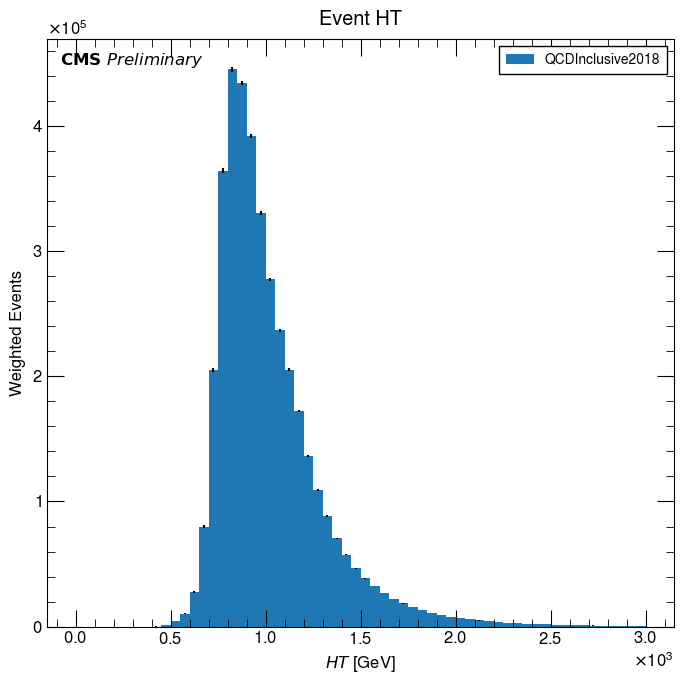

In [19]:
from analyzer.plotting.core_plots import *
h = histos["HT"]
hn = h["QCDInclusive2018",:]
fig,ax = drawAs1DHist(h,cat_axis="dataset", yerr=True)
addPrelim(ax)
addTitles(ax,hn)